In [1]:
import pandas as pd
import seaborn as sns
sns.set()
#import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../Data/rejected.csv')

In [4]:
rejected.shape

(27648741, 9)

In [5]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [6]:
#msnum.bar(rejected);

In [7]:
rejected.Risk_Score.value_counts(dropna=False)

NaN      18497630
501.0      178456
643.0       89033
0.0         86754
620.0       82840
           ...   
319.0           5
318.0           4
307.0           4
305.0           4
317.0           4
Name: Risk_Score, Length: 693, dtype: int64

In [8]:
rejected.Risk_Score.describe()

count    9.151111e+06
mean     6.281721e+02
std      8.993679e+01
min      0.000000e+00
25%      5.910000e+02
50%      6.370000e+02
75%      6.750000e+02
max      9.900000e+02
Name: Risk_Score, dtype: float64

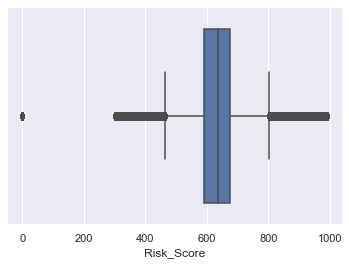

In [9]:
sns.boxplot(x='Risk_Score', data=rejected);

In [10]:
#rejected = rejected[rejected['Risk_Score'] != 0]

In [11]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [12]:
rejected.Risk_Score.describe()

count    9.151111e+06
mean     6.281721e+02
std      8.993679e+01
min      0.000000e+00
25%      5.910000e+02
50%      6.370000e+02
75%      6.750000e+02
max      9.900000e+02
Name: Risk_Score, dtype: float64

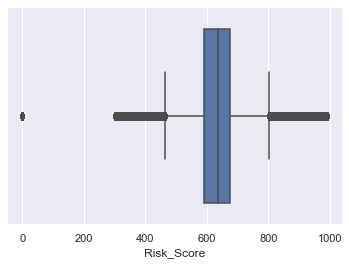

In [13]:
sns.boxplot(x='Risk_Score', data=rejected);

In [14]:
r1 = rejected[(rejected.Risk_Score <= 593) & (rejected.Risk_Score != 0)].assign(Score='Low')
r1.shape

(2287997, 10)

In [15]:
r2 = rejected[rejected.Risk_Score >= 675].assign(Score='High')
r2.shape

(2303575, 10)

In [16]:
r3 = rejected[(rejected.Risk_Score > 593) & (rejected.Risk_Score < 675)].assign(Score='Medium')
r3.shape

(4472785, 10)

In [17]:
r4 = rejected[(rejected.Risk_Score==0)].assign(Score='None')
r4.shape

(86754, 10)

In [18]:
r5 = rejected[rejected.Risk_Score.isna()].assign(Score='None')
r5.shape

(18497630, 10)

In [19]:
re_new = pd.concat([r1, r2, r3, r4, r5])

In [20]:
re_new

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,Score
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0,Low
9,2500.0,2007-05-28,timgerst,573.0,11.76%,407xx,KY,4 years,0.0,Low
29,10000.0,2007-05-30,rpinho78,475.0,21.77%,061xx,CT,< 1 year,0.0,Low
34,1000.0,2007-05-30,stnthoma22,429.0,15.92%,462xx,IN,2 years,0.0,Low
36,2000.0,2007-05-30,SGearhart1381,579.0,32.64%,658xx,MO,< 1 year,0.0,Low
...,...,...,...,...,...,...,...,...,...,...
27648730,7000.0,2016-12-31,car,NaN,22.74%,967xx,HI,< 1 year,0.0,None
27648731,9975.0,2016-12-31,credit_card,NaN,-1%,394xx,MS,NaN,0.0,None
27648735,2000.0,2016-12-31,small_business,NaN,27.45%,905xx,CA,NaN,0.0,None
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0,None


In [21]:
re_new.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
Score                          0
dtype: int64

In [22]:
#r = rejected.dropna().reset_index(drop=True)
#r
#msnum.bar(r);

In [35]:
r = re_new[['Score', 'Debt-To-Income Ratio', 'Employment Length']]
r

,Score,Debt-To-Income Ratio,Employment Length
4,Low,9.43%,< 1 year
9,Low,11.76%,4 years
29,Low,21.77%,< 1 year
34,Low,15.92%,2 years
36,Low,32.64%,< 1 year
...,...,...,...
27648730,None,22.74%,< 1 year
27648731,None,-1%,NaN
27648735,None,27.45%,NaN
27648737,None,1.48%,5 years


In [36]:
r.dtypes

Score                   object
Debt-To-Income Ratio    object
Employment Length       object
dtype: object

In [37]:
#r = r[['Risk_Score', 'Debt-To-Income Ratio']]
#r

In [38]:
r = r.rename(columns={"Debt-To-Income Ratio":"DI"})

In [39]:
r

,Score,DI,Employment Length
4,Low,9.43%,< 1 year
9,Low,11.76%,4 years
29,Low,21.77%,< 1 year
34,Low,15.92%,2 years
36,Low,32.64%,< 1 year
...,...,...,...
27648730,None,22.74%,< 1 year
27648731,None,-1%,NaN
27648735,None,27.45%,NaN
27648737,None,1.48%,5 years


In [40]:
r['DI'] = r['DI'].str.rstrip("%").astype(float)/100

In [41]:
r

,Score,DI,Employment Length
4,Low,0.0943,< 1 year
9,Low,0.1176,4 years
29,Low,0.2177,< 1 year
34,Low,0.1592,2 years
36,Low,0.3264,< 1 year
...,...,...,...
27648730,None,0.2274,< 1 year
27648731,None,-0.0100,NaN
27648735,None,0.2745,NaN
27648737,None,0.0148,5 years


In [42]:
r = r.assign(Accepted = 0)
r

,Score,DI,Employment Length,Accepted
4,Low,0.0943,< 1 year,0
9,Low,0.1176,4 years,0
29,Low,0.2177,< 1 year,0
34,Low,0.1592,2 years,0
36,Low,0.3264,< 1 year,0
...,...,...,...,...
27648730,None,0.2274,< 1 year,0
27648731,None,-0.0100,NaN,0
27648735,None,0.2745,NaN,0
27648737,None,0.0148,5 years,0


In [43]:
r.dtypes

Score                 object
DI                   float64
Employment Length     object
Accepted               int64
dtype: object

In [44]:
r.isnull().sum()

Score                     0
DI                        0
Employment Length    951355
Accepted                  0
dtype: int64

In [45]:
r.describe()

,DI,Accepted
count,2.764874e+07,27648741.0
mean,1.433401e+00,0.0
std,1.053916e+02,0.0
min,-1.000000e-02,0.0
25%,8.060000e-02,0.0
50%,1.998000e-01,0.0
75%,3.661000e-01,0.0
max,5.000003e+05,0.0


In [46]:
r = r.dropna().reset_index(drop=True)
r

,Score,DI,Employment Length,Accepted
0,Low,0.0943,< 1 year,0
1,Low,0.1176,4 years,0
2,Low,0.2177,< 1 year,0
3,Low,0.1592,2 years,0
4,Low,0.3264,< 1 year,0
...,...,...,...,...
26697381,None,-0.0100,< 1 year,0
26697382,None,0.1359,5 years,0
26697383,None,0.2274,< 1 year,0
26697384,None,0.0148,5 years,0


In [47]:
r.isnull().sum()

Score                0
DI                   0
Employment Length    0
Accepted             0
dtype: int64

In [48]:
accepted = pd.read_csv('../Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
accepted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,793

In [50]:
a = accepted[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length', 'addr_state', 'policy_code']]

In [51]:
a.shape

(2260701, 9)

In [52]:
a.isnull().sum()

loan_amnt              33
issue_d                33
purpose                33
fico_range_low         33
fico_range_high        33
annual_inc             37
emp_length         146940
addr_state             33
policy_code            33
dtype: int64

In [53]:
a[a.annual_inc == 0] 

,loan_amnt,issue_d,purpose,fico_range_low,fico_range_high,annual_inc,emp_length,addr_state,policy_code
18202,20000.0,Dec-2015,debt_consolidation,685.0,689.0,0.0,NaN,TX,1.0
65620,3700.0,Nov-2015,credit_card,680.0,684.0,0.0,NaN,TX,1.0
421705,40000.0,Mar-2018,home_improvement,695.0,699.0,0.0,NaN,TX,1.0
422321,40000.0,Mar-2018,debt_consolidation,755.0,759.0,0.0,NaN,WA,1.0
422379,3000.0,Mar-2018,other,790.0,794.0,0.0,2 years,AR,1.0
...,...,...,...,...,...,...,...,...,...
2228436,8750.0,Oct-2016,debt_consolidation,715.0,719.0,0.0,NaN,AR,1.0
2228456,18000.0,Oct-2016,debt_consolidation,680.0,684.0,0.0,< 1 year,NY,1.0
2230378,10000.0,Oct-2016,credit_card,705.0,709.0,0.0,NaN,MD,1.0
2232830,23950.0,Oct-2016,debt_consolidation,670.0,674.0,0.0,NaN,IL,1.0


In [54]:
a = a.drop(a[a.annual_inc == 0].index)

In [55]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [56]:
a = a.assign(Accepted = 1)

In [57]:
a = a.rename(columns={"FICO":"Risk_Score"})

In [58]:
a = a.assign(DI = (a['loan_amnt'] / a['annual_inc']))

In [60]:
a = a[['Risk_Score', 'DI', 'emp_length', 'Accepted']]

In [61]:
a = a.rename(columns={"emp_length":"Employment Length"})

In [62]:
a

,Risk_Score,DI,Employment Length,Accepted
0,677.0,0.065455,10+ years,1
1,717.0,0.380000,10+ years,1
2,697.0,0.317460,10+ years,1
3,787.0,0.318182,10+ years,1
4,697.0,0.099585,3 years,1
...,...,...,...,...
2260696,707.0,0.176211,9 years,1
2260697,662.0,0.218182,6 years,1
2260698,662.0,0.147368,10+ years,1
2260699,NaN,NaN,NaN,1


In [63]:
a.isna().sum()

Risk_Score               33
DI                       37
Employment Length    145373
Accepted                  0
dtype: int64

In [64]:
a['Employment Length'] = a['Employment Length'].replace(np.nan, 'None')

In [65]:
a

,Risk_Score,DI,Employment Length,Accepted
0,677.0,0.065455,10+ years,1
1,717.0,0.380000,10+ years,1
2,697.0,0.317460,10+ years,1
3,787.0,0.318182,10+ years,1
4,697.0,0.099585,3 years,1
...,...,...,...,...
2260696,707.0,0.176211,9 years,1
2260697,662.0,0.218182,6 years,1
2260698,662.0,0.147368,10+ years,1
2260699,NaN,NaN,None,1


In [66]:
a.shape

(2259034, 4)

In [67]:
a.isna().sum()

Risk_Score           33
DI                   37
Employment Length     0
Accepted              0
dtype: int64

In [68]:
a = a.dropna()

In [69]:
a.isna().sum()

Risk_Score           0
DI                   0
Employment Length    0
Accepted             0
dtype: int64

In [70]:
a.describe()

,Risk_Score,DI,Accepted
count,2.258997e+06,2.258997e+06,2258997.0
mean,7.005790e+02,5.738792e-01,1.0
std,3.300490e+01,8.876415e+01,0.0
min,6.120000e+02,1.612903e-04,1.0
25%,6.770000e+02,1.250000e-01,1.0
50%,6.920000e+02,2.000000e-01,1.0
75%,7.170000e+02,2.985075e-01,1.0
max,8.475000e+02,4.000000e+04,1.0


In [71]:
a.shape

(2258997, 4)

In [72]:
a1 = a[(a.Risk_Score <= 593) & (a.Risk_Score != 0)].assign(Score='Low')
a1.shape

(0, 5)

In [73]:
a2 = a[a.Risk_Score >= 675].assign(Score='High')
a2.shape

(1709320, 5)

In [74]:
a3 = a[(a.Risk_Score > 593) & (a.Risk_Score < 675)].assign(Score='Medium')
a3.shape

(549677, 5)

In [75]:
a4 = a[(a.Risk_Score==0)].assign(Score='None')
a4.shape

(0, 5)

In [76]:
a5 = a[a.Risk_Score.isna()].assign(Score='None')
a5.shape

(0, 5)

In [77]:
a_new = pd.concat([a1, a2, a3, a4, a5])

In [78]:
a_new

,Risk_Score,DI,Employment Length,Accepted,Score
0,677.0,0.065455,10+ years,1,High
1,717.0,0.380000,10+ years,1,High
2,697.0,0.317460,10+ years,1,High
3,787.0,0.318182,10+ years,1,High
4,697.0,0.099585,3 years,1,High
...,...,...,...,...,...
2260681,672.0,0.380952,10+ years,1,Medium
2260692,667.0,0.106667,10+ years,1,Medium
2260694,667.0,0.252632,7 years,1,Medium
2260697,662.0,0.218182,6 years,1,Medium


In [82]:
aa = a_new[['Score', 'DI', 'Employment Length', 'Accepted']]
aa

,Score,DI,Employment Length,Accepted
0,High,0.065455,10+ years,1
1,High,0.380000,10+ years,1
2,High,0.317460,10+ years,1
3,High,0.318182,10+ years,1
4,High,0.099585,3 years,1
...,...,...,...,...
2260681,Medium,0.380952,10+ years,1
2260692,Medium,0.106667,10+ years,1
2260694,Medium,0.252632,7 years,1
2260697,Medium,0.218182,6 years,1


In [81]:
r

,Score,DI,Employment Length,Accepted
0,Low,0.0943,< 1 year,0
1,Low,0.1176,4 years,0
2,Low,0.2177,< 1 year,0
3,Low,0.1592,2 years,0
4,Low,0.3264,< 1 year,0
...,...,...,...,...
26697381,None,-0.0100,< 1 year,0
26697382,None,0.1359,5 years,0
26697383,None,0.2274,< 1 year,0
26697384,None,0.0148,5 years,0


In [83]:
combo = pd.concat([aa,r]).reset_index(drop=True)
combo

,Score,DI,Employment Length,Accepted
0,High,0.065455,10+ years,1
1,High,0.380000,10+ years,1
2,High,0.317460,10+ years,1
3,High,0.318182,10+ years,1
4,High,0.099585,3 years,1
...,...,...,...,...
28956378,None,-0.010000,< 1 year,0
28956379,None,0.135900,5 years,0
28956380,None,0.227400,< 1 year,0
28956381,None,0.014800,5 years,0


In [84]:
combo.describe()

,DI,Accepted
count,2.895638e+07,2.895638e+07
mean,1.387415e+00,7.801378e-02
std,1.058467e+02,2.681933e-01
min,-1.000000e-02,0.000000e+00
25%,8.680000e-02,0.000000e+00
50%,2.004000e-01,0.000000e+00
75%,3.593750e-01,0.000000e+00
max,5.000003e+05,1.000000e+00


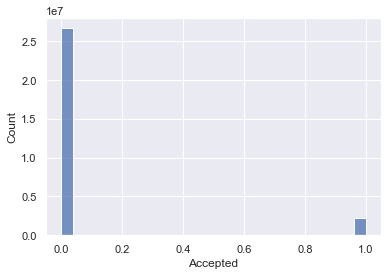

In [85]:
sns.histplot(data=combo, x='Accepted');

In [86]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [87]:
few.describe()

,DI,Accepted
count,28956.000000,28956.000000
mean,1.527902,0.078015
std,31.913556,0.268200
min,-0.010000,0.000000
25%,0.085900,0.000000
50%,0.199800,0.000000
75%,0.356700,0.000000
max,1999.980000,1.000000


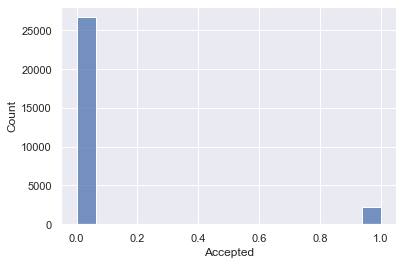

In [88]:
sns.histplot(data=few, x='Accepted');

In [89]:
few.isna().sum()

Score                0
DI                   0
Employment Length    0
Accepted             0
dtype: int64

In [90]:
from pycaret.classification import *

In [91]:
experiment = setup(data = few, target = 'Accepted', categorical_features = ['Employment Length'])

,Description,Value
0,session_id,2886
1,Target,Accepted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(28956, 4)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [92]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9698,0.9857,0.8371,0.7882,0.8117,0.7953,0.7958,0.0940
gbc,Gradient Boosting Classifier,0.9698,0.9866,0.8498,0.7818,0.8142,0.7978,0.7987,0.2070
nb,Naive Bayes,0.9697,0.9832,0.8903,0.7611,0.8204,0.8040,0.8070,0.0200
catboost,CatBoost Classifier,0.9690,0.9864,0.8276,0.7861,0.8062,0.7893,0.7898,0.9870
lightgbm,Light Gradient Boosting Machine,0.9687,0.9854,0.8270,0.7836,0.8045,0.7875,0.7880,0.0970
lr,Logistic Regression,0.9683,0.9848,0.8555,0.7651,0.8075,0.7903,0.7919,0.2740
knn,K Neighbors Classifier,0.9682,0.9597,0.8264,0.7791,0.8018,0.7845,0.7850,0.1000
ridge,Ridge Classifier,0.9649,0.0000,0.7307,0.8008,0.7635,0.7446,0.7459,0.0230
svm,SVM - Linear Kernel,0.9605,0.0000,0.7597,0.7397,0.7493,0.7279,0.7281,0.0240
dt,Decision Tree Classifier,0.9589,0.8658,0.7453,0.7321,0.7383,0.7160,0.7162,0.0230


In [93]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2886)


In [94]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [95]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.9878,0.8408,0.8000,0.8199,0.8043,0.8046
1,0.9665,0.9863,0.7975,0.7778,0.7875,0.7693,0.7694
2,0.9734,0.9856,0.8418,0.8210,0.8312,0.8168,0.8169
3,0.9704,0.9893,0.8544,0.7849,0.8182,0.8021,0.8030
4,0.9650,0.9847,0.8038,0.7605,0.7815,0.7625,0.7629
5,0.9660,0.9865,0.7911,0.7764,0.7837,0.7652,0.7653
6,0.9729,0.9877,0.8671,0.8012,0.8328,0.8181,0.8188
7,0.9650,0.9864,0.8354,0.7458,0.7881,0.7690,0.7705
8,0.9709,0.9865,0.8291,0.8037,0.8162,0.8004,0.8005


In [96]:
print(cb)

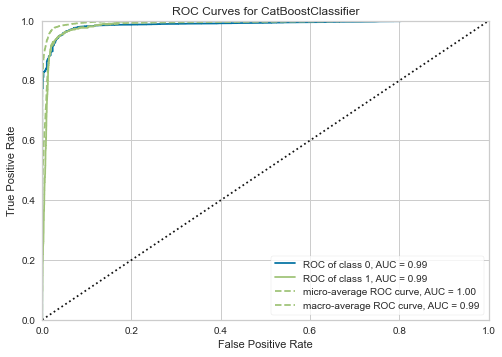

In [97]:
plot_model(cb, plot='auc')

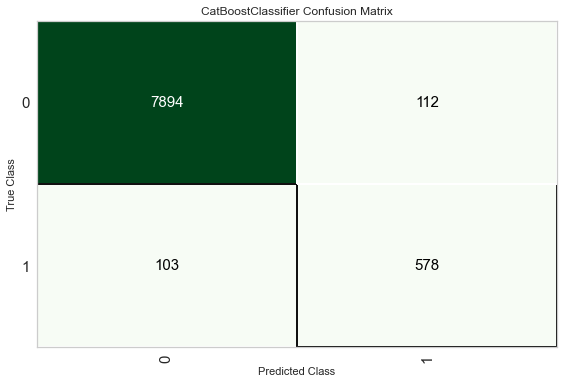

In [98]:
plot_model(cb, plot='confusion_matrix')

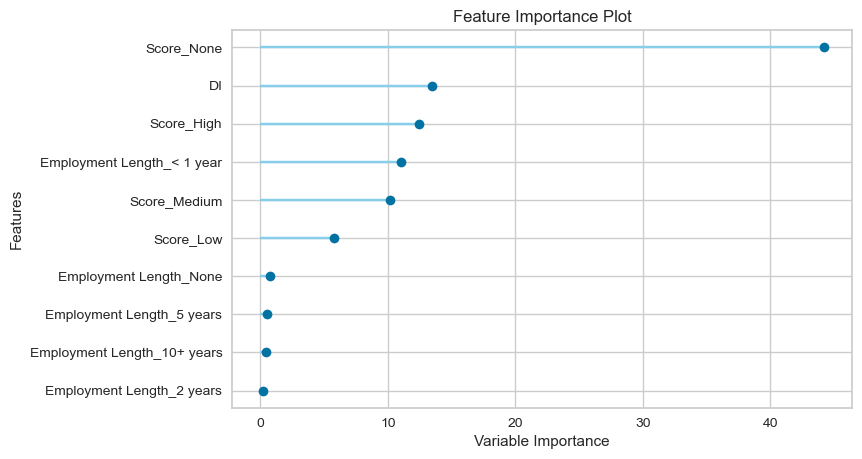

In [99]:
plot_model(cb, plot='feature')